# STUDENT NAME: ODUFUWA ODUTAYO THOMSON
# MATRIC NO: 209074209
# COURSE CODE: MIT 816

#K-MEANS CLUSTERING

##TASK 3 - Clustering an unstructured dataset with k-means clustering

###Import the necessary libraries

In [10]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

###Loading the dataset and beginning the prediction process

In [11]:
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [12]:
X[:20]

array([[ 0.60103418,  1.5353525 ],
       [ 0.75594526, -1.1723519 ],
       [ 1.35447877, -0.94852841],
       [ 3.1030897 ,  0.23348484],
       [ 0.75317779,  0.78751427],
       [ 1.0600389 ,  0.58798641],
       [ 0.36855907, -1.35598715],
       [ 0.62515477,  0.91539778],
       [ 0.54901996,  1.45381422],
       [ 0.74616631,  1.08854866],
       [ 2.16500456, -0.36476962],
       [ 1.36702575, -0.71923613],
       [ 0.82265269,  1.28245544],
       [ 2.06431386, -0.28638103],
       [ 1.45941827, -0.78635092],
       [ 0.35523359,  1.5413809 ],
       [ 2.78403394, -0.02389532],
       [-0.89482916,  2.36200585],
       [ 2.11992066, -0.11793322],
       [-0.35445947, -1.86919202]])

In [13]:
X.shape

(1000, 2)

Calling the KMeans alg

In [14]:
model = KMeans()
model.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [16]:
clusters = model.predict(X)
unique_clusters = unique(clusters)

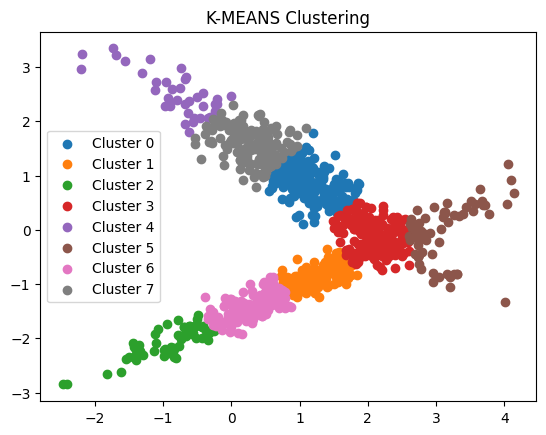

In [26]:
for cluster in unique_clusters:
  row = where(clusters==cluster)
  pyplot.scatter(X[row,0], X[row,1], label=f'Cluster {cluster}')

pyplot.legend()
pyplot.title('K-MEANS Clustering')
pyplot.show()

###ASSIGNMENT 3

####Question 1: Use an evaluation metric to evaluate and interpret the quality of the clustering process

Using an evaluation metric like the ***Silhouette Score*** to evaluate the quality of the clustering process. The *Silhouette Score* measures how similar each data point in one cluster is to the other data points in the same cluster compared to the nearest neighboring cluster. It provides a value between -1 and 1, with higher values indicating better-defined clusters.

In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4373086775632305


Interpretation:

>A Silhouette Score of 0.437 indicates that the clusters are somewhat well-defined, but there may be room for improvement. It's a reasonably good score, suggesting that the data points within each cluster are closer to each other than to data points in neighboring clusters.

>However, there is still some overlap between clusters, as indicated by the score being less than 1. This suggests that while the clustering is reasonably effective, it might not be perfect.

>In summary, a Silhouette Score of 0.437 is a decent starting point, but further exploration and fine-tuning of the clustering process could lead to even better results, depending on your specific goals and requirements.

####Question 2: Use BIRCH clustering and agglomerative clustering and evaluate the quality and interpret the result of the clusters.

#BIRCH CLUSTERING

In [25]:
from sklearn.cluster import Birch

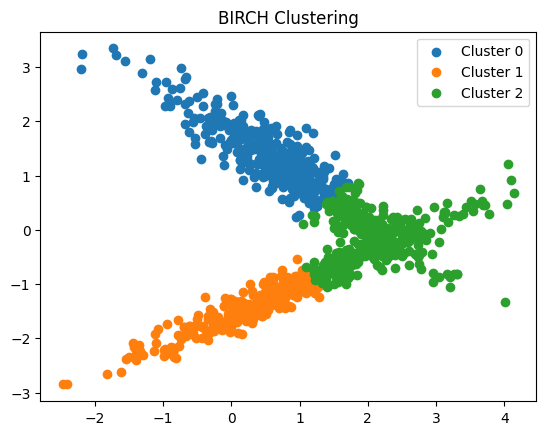

In [51]:
birch_model = Birch(threshold=1.5, n_clusters=None)

# Fit the BIRCH model to your data
birch_model.fit(X)

# Predict cluster labels for each data point
clusters_bc = birch_model.predict(X)

# Get unique cluster labels
unique_clusters_bc = unique(clusters_bc)

# Plot the clustered data points
for cluster in unique_clusters_bc:
    row = (clusters_bc == cluster)
    pyplot.scatter(X[row, 0], X[row, 1], label=f'Cluster {cluster}')

pyplot.legend()
pyplot.title('BIRCH Clustering')
pyplot.show()

####Using the Silhoutte evaluation metric also

In [49]:
bc_silhouette_avg = silhouette_score(X, cluster_bc)
print(f"Silhouette Score: {bc_silhouette_avg}")

Silhouette Score: 0.526621403282977


Interpretation:

>A Silhouette Score of 0.5266 is a relatively good result for your BIRCH clustering.

>A score above 0.5 suggests that your clusters are reasonably well-separated and that data points within each cluster are closer to each other than to data points in other clusters.

>In your case, a score of 0.5266 indicates that your BIRCH clustering has produced clusters that are reasonably distinct and internally cohesive.

#AGGLOMERATIVE CLUSTERING

In [50]:
from sklearn.cluster import AgglomerativeClustering

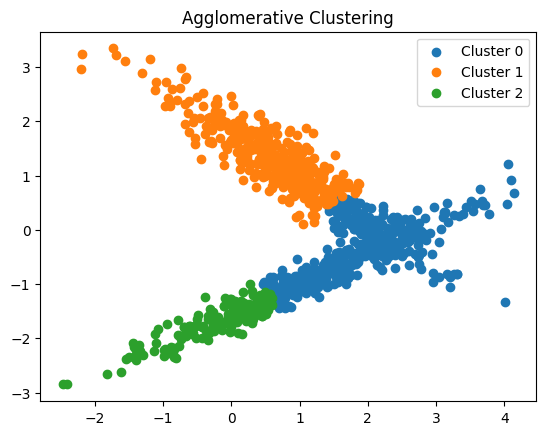

In [54]:
ac_model = AgglomerativeClustering(n_clusters=3)  # You can adjust the number of clusters as needed

# Fit the model to your data
clusters_ac = ac_model.fit_predict(X)

# Get unique cluster labels
unique_clusters_ac = unique(clusters_ac)

# Plot the clustered data points
for cluster in unique_clusters_ac:
    row = where(clusters_ac == cluster)
    pyplot.scatter(X[row, 0], X[row, 1], label=f'Cluster {cluster}')

pyplot.legend()
pyplot.title("Agglomerative Clustering")
pyplot.show()




Using Silhoutte evaluation metric

In [55]:
# Calculate the Silhouette Score to evaluate the quality of clustering
silhouette_avg = silhouette_score(X, clusters_ac)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.48886967140754006


Interpretation:

>The Silhouette Score of 0.48886967140754006 indicates that the agglomerative clustering has produced relatively well-separated clusters.

>A score of 0.4888 indicates reasonably good cluster separation.

##Comparing the three Clustering methods

##Definitions
>### K-Means Clustering:

1. Centroid-Based: K-Means assigns each data point to the nearest cluster center, minimizing the sum of squared distances.
2. Number of Clusters (K): You need to specify the number of clusters (K) beforehand, which can be a limitation.
3. Use Cases: Well-suited for evenly sized, spherical, and compact clusters. Works best when the clusters have similar density.

>### BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies):

1. Hierarchical and Incremental**: *BIRCH builds a hierarchical structure, making it suitable for a wide range of data types.
2. Number of Clusters: BIRCH doesn't require specifying K in advance and can adapt to the data's structure.
3. Use Cases: Effective for large datasets with varying cluster shapes and densities. Suitable for online learning scenarios.*

>### Agglomerative Clustering:

1. Hierarchical: Agglomerative clustering starts with each data point as a single cluster and iteratively merges the closest clusters.
2. Number of Clusters: Like BIRCH, it doesn't require specifying the number of clusters in advance.
3. Use Cases: Useful when dealing with data where clusters have a nested or hierarchical structure. It's also beneficial when you want to explore clusters at different granularity levels.


##Comparison

>K-Means vs. BIRCH: K-Means is sensitive to the initial placement of cluster centers and may not handle irregularly shaped clusters well. BIRCH is more robust and adaptive but can be less efficient for smaller datasets.

>K-Means vs. Agglomerative: K-Means works better for compact, equally sized clusters, while agglomerative clustering is more flexible and can handle various cluster shapes and sizes.

>BIRCH vs. Agglomerative: BIRCH is suitable for large datasets and can adapt to changing data over time. Agglomerative clustering is more interpretable and can reveal hierarchical relationships.

The choice between these clustering algorithms depends on your data's characteristics, the number of clusters you need, and whether you want a hierarchical view of clusters. You might also consider using a combination of these methods or exploring other clustering algorithms depending on your specific analysis goals.